<a href="https://colab.research.google.com/github/askewai/ML_challenge/blob/main/d13-fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### data source: https://www.openml.org/search?type=data&status=active&id=40996
### initial format: arff

In [1]:
import pandas as pd
from scipy.io import arff

file_path = "/content/fashionMNIST.arff"
data, meta = arff.loadarff(file_path)

df = pd.DataFrame(data)

for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode("utf-8")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# EDA

In [3]:
df.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,0.0,133.0,167.0,73.0,0.0,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,3.0,0.0,82.0,237.0,231.0,70.0,0.0,0.0,2
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [4]:
df.nunique()

,0
pixel1,7
pixel2,18
pixel3,29
pixel4,67
pixel5,111
...,...
pixel781,248
pixel782,234
pixel783,187
pixel784,73


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: float64(784), object(1)
memory usage: 419.2+ MB


In [6]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000
mean,0.000771,0.006414,0.034486,0.098886,0.247843,0.408714,0.802900,2.204386,5.634900,14.41000,...,34.582314,23.288643,16.611600,17.823371,22.887986,17.968129,8.524043,2.75140,0.836529,0.072914
std,0.087339,0.296605,1.200882,2.458872,4.408110,5.842288,8.186472,14.117208,23.698865,38.18827,...,57.584612,48.935288,42.075046,43.901606,51.853192,45.231601,29.527900,17.38577,9.258426,2.129924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,16.000000,45.000000,218.000000,185.000000,227.000000,230.000000,224.000000,225.000000,254.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,170.000000


In [7]:
df.isnull().sum()

,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
pixel5,0
...,...
pixel781,0
pixel782,0
pixel783,0
pixel784,0


In [8]:
print(df.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)


In [9]:
print(df["class"].isna().sum())

0


In [10]:
print(df.dtypes)

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
class        object
Length: 785, dtype: object


preprocessing

In [11]:
df["class"] = df["class"].astype(int)

In [12]:
df.dropna(subset=["class"], inplace=True)

In [13]:
if df.empty:
    raise ValueError("The dataframe is empty after handling missing values.")

In [14]:
X = df.drop(columns=["class"])
y = df["class"].fillna(0).astype(int)  # Fill NaNs with 0 before conversion

In [15]:
if X.empty or y.empty:
    raise ValueError("Features or target variable is empty after preprocessing.")

In [16]:
# Normalize pixel values
X = X / 255.0

In [17]:
if len(X) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("Not enough samples to perform train-test split.")

In [18]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [19]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# modelling

In [20]:
# Build CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.7212 - loss: 0.7530 - val_accuracy: 0.8745 - val_loss: 0.3549
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 80s 68ms/step - accuracy: 0.8717 - loss: 0.3483 - val_accuracy: 0.8869 - val_loss: 0.3048
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.8973 - loss: 0.2855 - val_accuracy: 0.8970 - val_loss: 0.2849
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.9069 - loss: 0.2538 - val_accuracy: 0.9033 - val_loss: 0.2617
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9200 - loss: 0.2209 - val_accuracy: 0.9074 - val_loss: 0.2500
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 90s 76ms/step - accuracy: 0.9239 - loss: 0.2064 - val_accuracy: 0.9098 - val_loss: 0.2435
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 65s 74ms/step - accuracy: 0.9332 - loss: 0.1826 - val_accuracy: 0.9089 - val_loss: 0.2496
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 76s 67ms/step - accuracy: 0.9414 - loss: 0.1606 - 

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

438/438 - 4s - 9ms/step - accuracy: 0.9141 - loss: 0.2526

Test accuracy: 0.9141


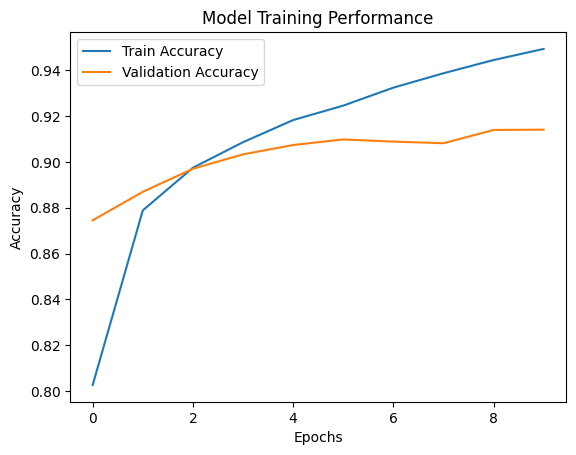

In [24]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training Performance')
plt.show()

The training accuracy (blue line) starts at around 80% and steadily increases to over 94% by the final epoch, indicating that the model is learning effectively from the training data. The validation accuracy (orange line) begins near 87% and improves to around 91%, showing that the model generalizes well but starts to plateau after a few epochs. The small gap between training and validation accuracy suggests slight overfitting, meaning the model performs better on the training data than on unseen data. While this overfitting is not extreme, it could be mitigated by techniques such as adding dropout layers, using data augmentation, or implementing early stopping to prevent unnecessary training. Overall, the model demonstrates strong performance, but further tuning could improve its generalization to new data.